# 📝 Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#📌 Extracción

In [2]:
# Cargar JSON
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

# Expandir columnas anidadas
df_customer = pd.json_normalize(df['customer'])
df_phone    = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account  = pd.json_normalize(df['account'])

# Concatenar todas las columnas aplanadas con las principales
df_final = pd.concat([
    df[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# Ver las primeras filas
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

### 2.1) Conocer el conjunto de datos

In [3]:
df=df_final
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
# Ver dimensiones
df.shape

(7267, 21)

In [5]:
# Ver tipos de datos
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [6]:
# Ver valores únicos por columna categórica
df.select_dtypes(include='object').nunique()

,0
customerID,7267
Churn,3
gender,2
Partner,2
Dependents,2
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [7]:
# Ver valores nulos
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [8]:
# 1. Conversión booleana desde 'Yes'/'No'
bool_cols = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in bool_cols:
    df[col] = df[col].map({'Yes': True, 'No': False})

# 2. SeniorCitizen: convertir 1/0 a True/False
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)

# 3. Categorías nominales
category_cols = [
    'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaymentMethod'
]
for col in category_cols:
    df[col] = df[col].astype('category')

# 4. Cargos mensuales y totales
df['Charges.Monthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# 5. customerID como string explícitamente
df['customerID'] = df['customerID'].astype(str)


In [9]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


### 2.2) Comprobación de incoherencias en los datos

#### ✅ 2.2.1. Valores ausentes (NaN)

In [10]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

,0
Churn,224
Charges.Total,11


#### ✅ 2.2.2. Duplicados

In [11]:
duplicated_rows = df.duplicated()
df[duplicated_rows].shape


(0, 21)

#### ✅ 2.2.3. Errores de formato y tipos inconsistentes

In [12]:
for col in df.select_dtypes(include='category').columns:
    print(f'{col}: {df[col].unique()}')


gender: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
MultipleLines: ['No', 'Yes', 'No phone service']
Categories (3, object): ['No', 'No phone service', 'Yes']
InternetService: ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
OnlineSecurity: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
OnlineBackup: ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
DeviceProtection: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
TechSupport: ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
StreamingTV: ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
StreamingMovies: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Contract: ['One year', 'Month-to-month', 'Two

####✅ 2.2.4. Inconsistencias en categorías

In [13]:
print(df['gender'].unique())              # Esperado: ['Male', 'Female']
print(df['InternetService'].unique())     # Esperado: ['DSL', 'Fiber optic', 'No']
print(df['Contract'].unique())            # Esperado: 3 tipos de contrato

['Female', 'Male']
Categories (2, object): ['Female', 'Male']
['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
['One year', 'Month-to-month', 'Two year']
Categories (3, object): ['Month-to-month', 'One year', 'Two year']


Uno de las primeras observaciones es que los valores nules corresponde a clientes nuevos que aun no han facturado, o estan en proceso.

In [14]:
df[df['Charges.Total'].isnull()]


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,False,Female,False,True,True,0,False,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,False,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,False,Female,False,True,True,0,True,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.00,NaN
1955,2775-SEFEE,False,Male,False,False,True,0,True,Yes,DSL,...,Yes,No,Yes,No,No,Two year,True,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,False,Male,False,True,True,0,True,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,True,Mailed check,19.70,NaN
2232,3115-CZMZD,False,Male,False,False,True,0,True,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.25,NaN
2308,3213-VVOLG,False,Male,False,True,True,0,True,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.35,NaN
2930,4075-WKNIU,False,Female,False,True,True,0,True,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,False,Mailed check,73.35,NaN
3134,4367-NUYAO,False,Male,False,True,True,0,True,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.75,NaN
3203,4472-LVYGI,False,Female,False,True,True,0,False,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,True,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,False,Female,False,True,True,0,True,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,False,Mailed check,80.85,NaN


In [15]:
df = df[df['tenure'] > 0]


In [16]:
df = df[df['Churn'].notna()]


In [17]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

,0


### Resumén desarrollado en carga y limpieza

Bueno, lo primero que hice fue cargar los datos de clientes de Telecom X, que venían en formato JSON. Este archivo tenía información valiosa, pero venía algo desordenado: muchos campos estaban anidados en diccionarios. Así que lo que hice fue reorganizar esos datos para que cada columna representara claramente una variable, como el género del cliente, si tiene internet, tipo de contrato, etc.

Después, revisé los tipos de datos de cada columna y encontré que algunas, como el total de cobros (Charges.Total), venían como texto en lugar de número. Eso lo corregí convirtiéndolo a tipo numérico. En ese proceso, descubrí que había varios valores vacíos, y me di cuenta de algo interesante: esos casos correspondían a clientes nuevos, que tenían 0 meses de antigüedad y por lo tanto aún no habían recibido su primera factura. En esos casos, decidí reemplazar el valor nulo por un 0.

Hasta ahí todo bien, pero luego detecté que había más de 200 registros donde el campo Churn, que indica si el cliente se fue o no, venía vacío. Como no se puede analizar si un cliente se fue sin tener ese dato, decidí eliminar esos registros para no contaminar el análisis.

Con eso, ya tengo una base limpia, sin errores, sin valores faltantes en variables clave, y lista para explorar y sacar conclusiones sobre por qué se están yendo los clientes.



In [18]:
# Crear columna 'Cuentas_Diarias' dividiendo el monto mensual por 30
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30

In [19]:
# Aplicar transformación en columnas relevantes (Churn y las de servicios)
columnas_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

map_si_no = {True: 1, False: 0}

for col in columnas_binarias:
    df_final[col] = df_final[col].map(map_si_no)
    # Si la columna es 'Churn' rellenamos NaN con 0, para otras columnas no hay NaN
    if col == 'Churn':
        df_final[col] = df_final[col].fillna(0)
    df_final[col] = df_final[col].astype(int)


In [20]:
# Definir diccionario para transformar "Sí"/"No" a 1 y 0
map_si_no = {'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0, 'True': 1, 'False': 0, True: 1, False: 0}

for col in columnas_binarias:
    df_final[col] = df_final[col].map(map_si_no).astype(int)

# Algunas columnas que vienen en texto con categorías que conviene traducir o simplificar
df_final['gender'] = df_final['gender'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df_final['InternetService'] = df_final['InternetService'].replace({'DSL': 'DSL', 'Fiber optic': 'Fibra Óptica', 'No': 'Sin Servicio'})

# Renombrar columnas para que sean más claras
df_final.rename(columns={
    'Churn': 'Abandono',
    'gender': 'Género',
    'SeniorCitizen': 'Adulto Mayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Servicio_Teléfono',
    'MultipleLines': 'Líneas_Múltiples',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Respaldo_Online',
    'DeviceProtection': 'Protección_Dispositivo',
    'TechSupport': 'Soporte_Técnico',
    'StreamingTV': 'TV_Streaming',
    'StreamingMovies': 'Películas_Streaming',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Factura_Digital',
    'PaymentMethod': 'Método_Pago',
    'Charges.Monthly': 'Cobro_Mensual',
    'Charges.Total': 'Cobro_Total'
}, inplace=True)


<ipython-input-20-eedd3f919231>:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_final['gender'] = df_final['gender'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
<ipython-input-20-eedd3f919231>:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_final['InternetService'] = df_final['InternetService'].replace({'DSL': 'DSL', 'Fiber optic': 'Fibra Óptica', 'No': 'Sin Servicio'})


In [21]:
# Ver tipos de datos
df_final.dtypes

,0
customerID,object
Abandono,int64
Género,category
Adulto Mayor,bool
Pareja,int64
Dependientes,int64
Meses_Contrato,int64
Servicio_Teléfono,int64
Líneas_Múltiples,category
Servicio_Internet,category


#📊 Carga y análisis

In [22]:
df_final.describe()


,Abandono,Pareja,Dependientes,Meses_Contrato,Servicio_Teléfono,Factura_Digital,Cobro_Mensual,Cobro_Total
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.257190,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213
std,0.437115,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.632997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,400.225000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000
75%,1.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3785.300000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000


Para empezar, hice un resumen estadístico de las variables numéricas en el conjunto de datos. Esto incluye calcular medidas como la media, la mediana, la desviación estándar, el valor mínimo, máximo y los percentiles. Estas métricas ayudan a entender cómo se distribuyen las variables y si hay valores atípicos o inconsistencias.

Para obtener esta información, usé la función describe() de pandas, que es rápida y efectiva para resumir grandes cantidades de datos numéricos.

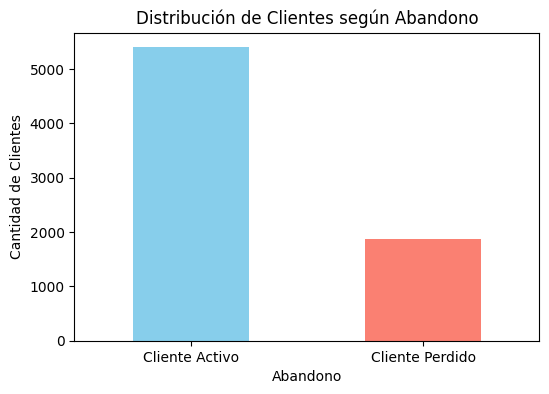

In [23]:
# Contar valores de Abandono
conteo_abandono = df_final['Abandono'].value_counts()

# Graficar
plt.figure(figsize=(6,4))
conteo_abandono.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks(ticks=[0,1], labels=['Cliente Activo', 'Cliente Perdido'], rotation=0)
plt.title('Distribución de Clientes según Abandono')
plt.ylabel('Cantidad de Clientes')
plt.show()

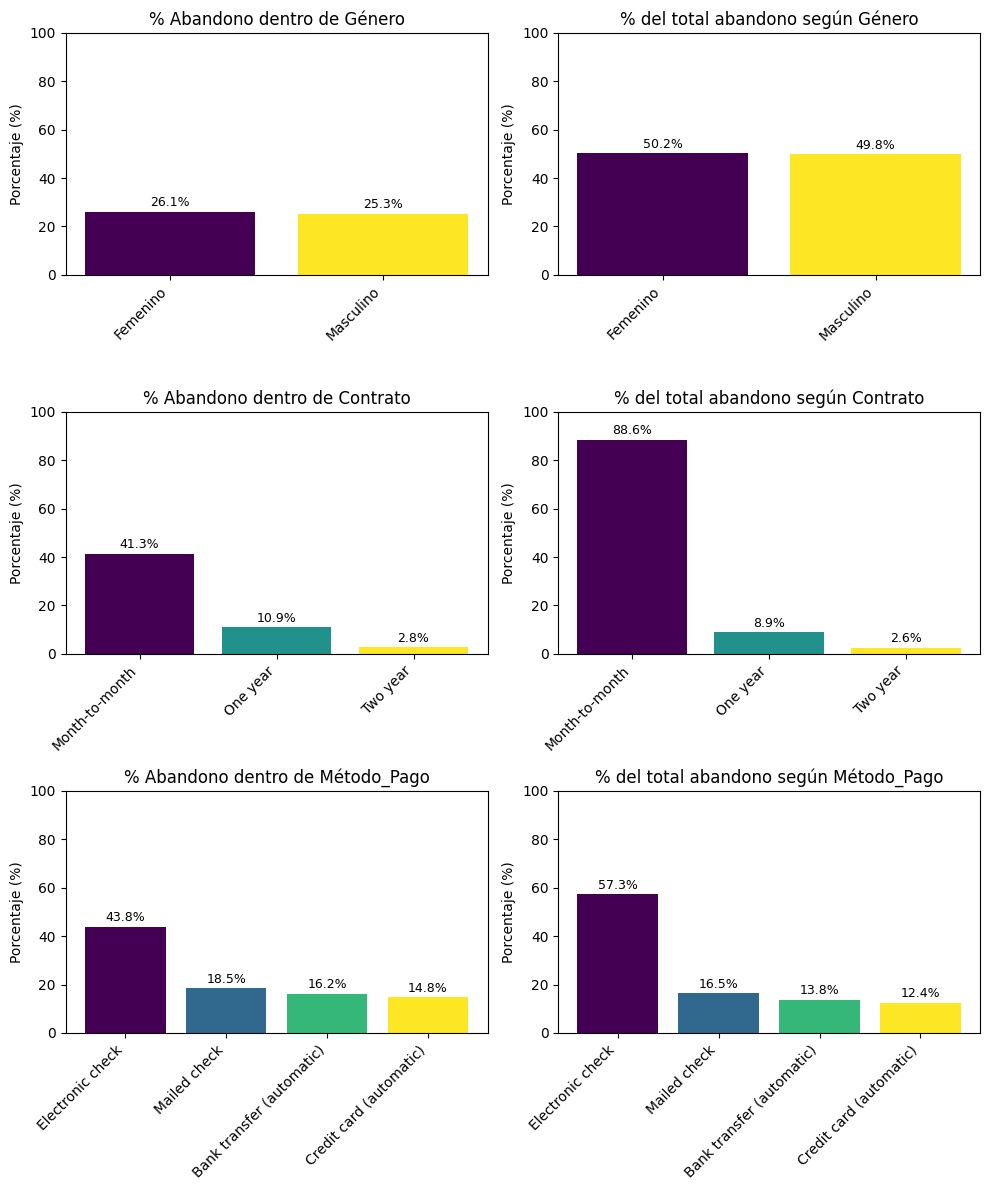

In [24]:
categorical_cols = ['Género', 'Contrato', 'Método_Pago']

fig, axes = plt.subplots(len(categorical_cols), 2, figsize=(10, 4*len(categorical_cols)))

for i, col in enumerate(categorical_cols):
    # 1) Porcentaje abandono dentro de la categoría
    abandono_pct = df_final.groupby(col, observed=True)['Abandono'].mean() * 100
    abandono_pct = abandono_pct.sort_values(ascending=False)

    bars1 = axes[i, 0].bar(range(len(abandono_pct)), abandono_pct.values,
                          color=plt.cm.viridis(np.linspace(0, 1, len(abandono_pct))))
    axes[i, 0].set_title(f'% Abandono dentro de {col}')
    axes[i, 0].set_ylabel('Porcentaje (%)')
    axes[i, 0].set_ylim(0, 100)
    axes[i, 0].set_xticks(range(len(abandono_pct)))
    axes[i, 0].set_xticklabels(abandono_pct.index.astype(str), rotation=45, ha='right')
    for bar in bars1:
        height = bar.get_height()
        axes[i, 0].text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

    # 2) Porcentaje del total de abandonos que representa cada categoría
    total_abandono = df_final['Abandono'].sum()
    abandono_por_categoria = df_final[df_final['Abandono'] == 1].groupby(col, observed=True)['Abandono'].count()
    abandono_por_categoria_pct = (abandono_por_categoria / total_abandono) * 100
    abandono_por_categoria_pct = abandono_por_categoria_pct.sort_values(ascending=False)

    bars2 = axes[i, 1].bar(range(len(abandono_por_categoria_pct)), abandono_por_categoria_pct.values,
                          color=plt.cm.viridis(np.linspace(0, 1, len(abandono_por_categoria_pct))))
    axes[i, 1].set_title(f'% del total abandono según {col}')
    axes[i, 1].set_ylabel('Porcentaje (%)')
    axes[i, 1].set_ylim(0, 100)
    axes[i, 1].set_xticks(range(len(abandono_por_categoria_pct)))
    axes[i, 1].set_xticklabels(abandono_por_categoria_pct.index.astype(str), rotation=45, ha='right')
    for bar in bars2:
        height = bar.get_height()
        axes[i, 1].text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

#📄Informe final

**Análisis Técnico de Evasión de Clientes - Telecom X**

El presente análisis se enmarca en el proyecto de churn de clientes de Telecom X, cuyo objetivo es identificar patrones relevantes que expliquen la probabilidad de abandono del servicio. A partir de un estudio detallado de variables demográficas y contractuales, se lograron identificar distribuciones específicas que permiten correlacionar características del cliente con su propensión a cancelar el contrato.

En primer lugar, la segmentación por género muestra una distribución equilibrada en cuanto a la representación del churn. Las mujeres constituyen el 50.2% del total de abandonos, mientras que los hombres representan el 49.8%. Las tasas de abandono dentro de cada grupo demográfico son similares, con un 26.1% para mujeres y un 25.3% para hombres, lo que indica una diferencia marginal de apenas 0.8 puntos porcentuales. Esto sugiere que la variable género no es un predictor significativo para la evasión, pues ambos segmentos exhiben comportamientos homogéneos frente a la cancelación del servicio.

Por otro lado, la modalidad contractual revela un patrón mucho más determinante. Los clientes con contratos mes a mes presentan una tasa de abandono muy elevada, alcanzando el 41.3%, mientras que quienes tienen contratos anuales y bianuales presentan tasas significativamente menores, de 10.9% y 2.8% respectivamente. Este comportamiento evidencia una correlación negativa fuerte entre la duración del contrato y la probabilidad de churn: a menor compromiso temporal, mayor riesgo de abandono. Además, la contribución relativa al churn total destaca que el 88.6% de los abandonos proviene de contratos mes a mes, situando a este segmento como el principal foco de riesgo para la empresa.

En cuanto a la metodología de pago, el análisis muestra una jerarquía clara en los niveles de riesgo asociados. El pago mediante cheque electrónico presenta la tasa más alta de abandono, con un 43.8%, seguido por cheque postal (18.5%), transferencia bancaria automática (16.2%) y tarjeta de crédito (14.8%). Este patrón indica una correlación inversa entre la automatización del proceso de pago y la retención de clientes: los métodos de pago manuales están asociados con tasas de churn significativamente mayores. En la distribución del churn total, el cheque electrónico concentra el 57.3% de los abandonos, mientras que los métodos manuales en conjunto representan el 73.8%, contrastando con el 26.2% de métodos automatizados.

Las implicaciones estratégicas de estos hallazgos son claras: la flexibilidad contractual y los métodos de pago manuales constituyen los principales vectores de riesgo para la evasión de clientes. La combinación de contratos mes a mes con pagos manuales, especialmente mediante cheque electrónico, configura el perfil con mayor propensión a abandonar el servicio. Por ello, se recomienda enfocar las acciones de mitigación en fomentar la migración hacia contratos de mayor duración y en la automatización de los procesos de pago, lo que podría generar un impacto significativo en la reducción de la tasa de churn y en la mejora de la retención de clientes en Telecom X.